In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import calendar


### Importing the data and clean the dataset if needed

In [3]:
# Importing the files and checking if they are clean if not to first clean
Customer_Acqusition_df = pd.read_csv("C:\\Users\\ayirp\\Desktop\\DataAnalysis\\Python\\AnalytixLabs\\PythonCaseStudy\\Python Foundation Case Study 2 - Credit Card Case Study\\Customer Acqusition.csv")
Spend_df = pd.read_csv("C:\\Users\\ayirp\\Desktop\\DataAnalysis\\Python\\AnalytixLabs\\PythonCaseStudy\\Python Foundation Case Study 2 - Credit Card Case Study\\spend.csv")
Repayment_df = pd.read_csv("C:\\Users\\ayirp\\Desktop\\DataAnalysis\\Python\\AnalytixLabs\\PythonCaseStudy\\Python Foundation Case Study 2 - Credit Card Case Study\\Repayment.csv")

In [4]:
Customer_Acqusition_df.head()

# Removing the unwanted column
Customer_Acqusition_df.pop('No')

Customer_Acqusition_df.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [5]:
# Checking the Spend data
Spend_df.head()

# Removing the SI column
Spend_df.pop('Sl No:')

# Changing month datatype to date time
Spend_df['Month'] = pd.to_datetime(Spend_df['Month'])

Spend_df.head()

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07


In [6]:

# Remove the unwanted column 
Repayment_df.pop('Unnamed: 4')
Repayment_df.pop('SL No:')

# Dropping Nan rows
Repayment_df.dropna()

# Changing month datatype to date time
Repayment_df['Month'] = pd.to_datetime(Repayment_df['Month'])

display(Repayment_df.head())

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


### Q1) In the above dataset,
### a. In case age is less than 18, replace it with mean of age values.
### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)
### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [7]:
# 1 a) a. In case age is less than 18, replace it with mean of age values.

# Calculating the mean
age_mean =round( Customer_Acqusition_df['Age'].mean(),2)

print('The mean of the age of customers that is to be replayed for cuatomers below the age 18 is :',age_mean)

# Assigning the mean
Customer_Acqusition_df.loc[Customer_Acqusition_df.Age < 18 , 'Age'] = age_mean

display(Customer_Acqusition_df)

The mean of the age of customers that is to be replayed for cuatomers below the age 18 is : 46.49


,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...
95,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [8]:
# 1b) In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

Customer_Spend_Data = Customer_Acqusition_df.merge(Spend_df, left_on ='Customer', right_on='Customer',how='left')

# Records where Amount > Limit
AmtGreaterLimit = Customer_Spend_Data[Customer_Spend_Data['Amount'] > Customer_Spend_Data['Limit']]

print('The records where Amount > Limit for suppose customer A2 BEFORE changing values are: ')
display(AmtGreaterLimit[AmtGreaterLimit['Customer'] == 'A2'])

# Assigning 50% of limit to amount when amt > limit 
Customer_Spend_Data.loc[Customer_Spend_Data.Amount > Customer_Spend_Data.Limit, 'Amount'] = Customer_Spend_Data.Limit/2

print('The records where Amount > Limit for suppose customer A2 AFTER changing values are: ')
display(Customer_Spend_Data[Customer_Spend_Data['Customer'] == 'A2'])



The records where Amount > Limit for suppose customer A2 BEFORE changing values are: 


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,117089.16
24,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-02-04,FOOD,175345.84
25,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-04-03,RENTAL,367364.53
26,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-12,RENTAL,366519.94
27,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-03,CLOTHES,197585.76
28,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-05-06,TRAIN TICKET,369689.78


The records where Amount > Limit for suppose customer A2 AFTER changing values are: 


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,RENTAL,50000.00
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,TRAIN TICKET,50000.00
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,BUS TICKET,50000.00
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,PETRO,50000.00
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-09-03,JEWELLERY,50000.00
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-11-03,MOVIE TICKET,75728.35
24,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-02-04,FOOD,50000.00
25,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-04-03,RENTAL,50000.00
26,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-12,RENTAL,50000.00
27,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-03,CLOTHES,50000.00


In [9]:
# 1c) Incase the repayment amount is more than the limit, replace the repayment with the limit

Customer_Repayment_Data = Customer_Acqusition_df.merge(Repayment_df, left_on ='Customer', right_on='Customer',how='left')

# Records where the repayment amount > the limit
repGreaterlimit = Customer_Repayment_Data[Customer_Repayment_Data.Amount > Customer_Repayment_Data.Limit]

print('The records where repayment amount > Limit for suppose customer A2 BEFORE changing values are:')
display(repGreaterlimit[repGreaterlimit.Customer == 'A2'])

# Replacing the repayment with the limit where the repayment amount > the limit
print('The records where repayment amount > Limit for suppose customer A2 AFTER changing values are:')
Customer_Repayment_Data.loc[Customer_Repayment_Data.Amount > Customer_Repayment_Data.Limit, 'Amount'] = Customer_Repayment_Data.Limit
display(Customer_Repayment_Data[Customer_Repayment_Data.Customer == 'A2'])

The records where repayment amount > Limit for suppose customer A2 BEFORE changing values are:


,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,185955.07
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,412783.34
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,148038.67
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,179144.68
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-08-03,381635.66
24,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-10-03,298423.86
25,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-03,431953.19
26,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-04-02,339899.24
27,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-25,298200.38
28,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-23,132970.25


The records where repayment amount > Limit for suppose customer A2 AFTER changing values are:


,Customer,Age,City,Product,Limit,Company,Segment,Month,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-03,100000.0
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-28,100000.0
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-04-06,100000.0
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-11-23,100000.0
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-11-22,10274.0
23,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-08-03,100000.0
24,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-10-03,100000.0
25,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2005-02-03,100000.0
26,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2006-04-02,100000.0
27,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,2004-01-25,100000.0


### 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?
### b. How many distinct categories exist?
### c. What is the average monthly spend by customers?
### d. What is the average monthly repayment by customers?
### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
### (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
### f. What are the top 5 product types?
### g. Which city is having maximum spend?
### h. Which age group is spending more money?
### i. Who are the top 10 customers in terms of repayment?


In [10]:
# 2a) How many distinct customers exist?

no_of_customers = Customer_Acqusition_df.Customer.count()
print('The number of distinct customers are:',no_of_customers)

The number of distinct customers are: 100


In [11]:
# 2b) How many distinct categories exist?

# Finding the distinct categories and their count
no_distinct_categories = Customer_Acqusition_df['Product'].drop_duplicates().count()
distinct_categories = Customer_Acqusition_df['Product'].drop_duplicates()

print('The number of distinct categories are :',no_distinct_categories)
print('\nThe distinct categories are:\n',distinct_categories)

The number of distinct categories are : 3

The distinct categories are:
 0        Gold
1      Silver
2    Platimum
Name: Product, dtype: object


In [12]:
# 2c) What is the average monthly spend by customers?

Customer_Spend_Data
avg_spend = Customer_Spend_Data.groupby([Customer_Spend_Data['Customer'], Customer_Spend_Data['Month'].dt.to_period('M')])['Amount'].mean().reset_index()

display(avg_spend)

,Customer,Month,Amount
0,A1,2004-01,373274.006667
1,A1,2004-02,52208.650000
2,A1,2004-05,361141.310000
3,A1,2005-01,369694.070000
4,A1,2005-02,205992.450000
...,...,...,...
802,A95,2004-01,240401.500000
803,A96,2004-01,54729.660000
804,A97,2004-01,5000.000000
805,A98,2004-01,5000.500000


In [13]:
# 2d) What is the average monthly repayment by customers?

avg_repayment = Customer_Repayment_Data.groupby([Customer_Repayment_Data['Customer'], Customer_Repayment_Data['Month'].dt.to_period('M')])['Amount'].mean().reset_index()
display(avg_repayment)

,Customer,Month,Amount
0,A1,2004-01,373638.901667
1,A1,2004-02,117964.430000
2,A1,2005-01,165972.880000
3,A1,2005-02,165977.342500
4,A1,2005-07,297176.740000
...,...,...,...
793,A95,2004-01,369405.960000
794,A96,2004-01,100000.000000
795,A97,2004-01,10000.000000
796,A98,2004-01,10001.000000


In [14]:
# 2e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
#    (Profit is defined as interest earned on Monthly Profit.
#    Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


# Renaming the month and amount for the monthly spend data calculated previously
avg_spend.rename( columns ={ 'Month' : 'Spend_Month', 'Amount' : 'Spend_Amount'}, inplace = True)

# Renaming the month and amount for the monthly repayment data calculated previously
avg_repayment.rename( columns ={ 'Month' : 'Repayment_Month', 'Amount' : 'Repayment_Amount'}, inplace = True)

# Merging the monthly spend and repayment data
avg_monthly_spend_repayment = avg_spend.merge(avg_repayment, left_on = ['Customer', 'Spend_Month'], right_on = ['Customer', 'Repayment_Month'], )

# Calculating the monthly profit
avg_monthly_spend_repayment['Monthly_Profit'] = avg_monthly_spend_repayment.Repayment_Amount - avg_monthly_spend_repayment.Spend_Amount

# Calculating the profit where the monthly profit is positive
avg_monthly_spend_repayment['Profit'] = np.where(avg_monthly_spend_repayment.Monthly_Profit > 0, (avg_monthly_spend_repayment.Monthly_Profit * 2.9)/100, np.nan)

print('The profit for the bank for each month is : \n')
display(avg_monthly_spend_repayment)

The profit for the bank for each month is : 



,Customer,Spend_Month,Spend_Amount,Repayment_Month,Repayment_Amount,Monthly_Profit,Profit
0,A1,2004-01,373274.006667,2004-01,373638.901667,364.8950,10.581955
1,A1,2004-02,52208.650000,2004-02,117964.430000,65755.7800,1906.917620
2,A1,2005-01,369694.070000,2005-01,165972.880000,-203721.1900,NaN
3,A1,2005-02,205992.450000,2005-02,165977.342500,-40015.1075,NaN
4,A1,2005-11,183839.610000,2005-11,402099.780000,218260.1700,6329.544930
...,...,...,...,...,...,...,...
498,A95,2004-01,240401.500000,2004-01,369405.960000,129004.4600,3741.129340
499,A96,2004-01,54729.660000,2004-01,100000.000000,45270.3400,1312.839860
500,A97,2004-01,5000.000000,2004-01,10000.000000,5000.0000,145.000000
501,A98,2004-01,5000.500000,2004-01,10001.000000,5000.5000,145.014500


In [15]:
# 2f) What are the top 5 product types?

# Calculatimg the different product types and their count
product_type_count = Spend_df['Type'].value_counts().sort_values(ascending = False)

print('The Top 5 product types are:\n\n', product_type_count.head(5))

The Top 5 product types are:

 PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64


In [17]:
# 2g) Which city is having maximum spend?

# Calculating spend amount based on the city and sort it in descending order
city_spend = Customer_Spend_Data.groupby('City').agg({'Amount' : sum}).sort_values('Amount',ascending = False)

display('The city with maximum spend is :',city_spend.head(1))


'The city with maximum spend is :'

,Amount
City,
COCHIN,45963513.5


In [18]:
# 2h) Which age group is spending more money?

# Changing the datatype of the Age column as it had become a float when calculating and assigning the mean in Q 1a
Customer_Spend_Data['Age'] = Customer_Spend_Data['Age'].astype(np.int64)


# defining the bins and labels to use the pd.cut() function create the age ranges

Customer_Spend_Data['Age_Range'] = pd.cut(Customer_Spend_Data.Age, bins = [18, 30, 40, 50, 60, 70, 80], labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+'], include_lowest = True)

# Grouping by the age range and finding out the sum
age_grp_spend = Customer_Spend_Data.groupby('Age_Range').agg({'Amount' : sum }).sort_values('Amount', ascending = False)

display('The top 3 age groups and their spendings  are:\n', age_grp_spend.head(3))


'The top 3 age groups and their spendings  are:\n'

,Amount
Age_Range,
40-49,57048361.87
18-29,52689898.21
30-39,37329313.58


In [19]:
# 2i) Who are the top 10 customers in terms of repayment?

cust_repayment = Customer_Repayment_Data.groupby('Customer').agg({'Amount' : sum}).sort_values('Amount', ascending = False)

display('The top 10 customers based on repayment are : \n', cust_repayment.head(10))

'The top 10 customers based on repayment are : \n'

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### Q3) Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

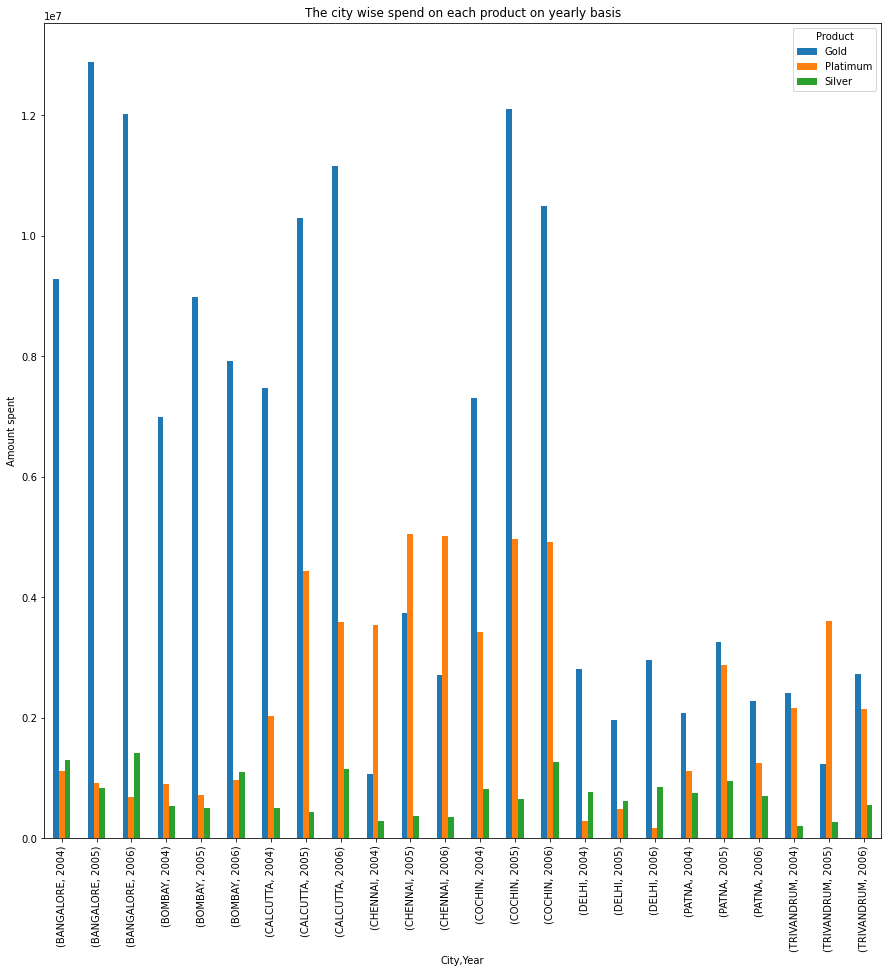

In [20]:
# Getting the Year from the given date of spend data
Customer_Spend_Data['Year'] = Customer_Spend_Data['Month'].dt.to_period('Y')

# Calculating the citywise spend
city_pdt_spend = Customer_Spend_Data.groupby(['City','Product', 'Year']).agg({'Amount' : sum})

# Creating a pivot table so as to create a chart
city_pdt_spend_pivot = pd.pivot_table(data = city_pdt_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

# Displaying the pivot table
display(city_pdt_spend_pivot)

# Generating a chart for the pivot table
city_pdt_spend_pivot.plot(kind='bar', figsize=(15,15))
plt.ylabel("Amount spent")
plt.title("The city wise spend on each product on yearly basis")
plt.show()


### Q4. Create graphs for
### a. Monthly comparison of total spends, city wise
### b. Comparison of yearly spend on air tickets
### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


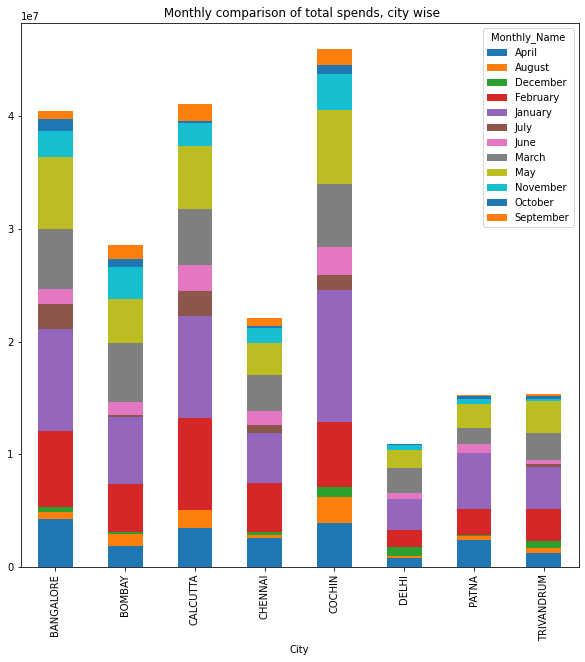

In [21]:
# 4a) Monthly comparison of total spends, city wise

# Converting the month period object to datetime. First converting it to a string and then converting it.
Customer_Spend_Data['Month'] = Customer_Spend_Data['Month'].astype(str)
Customer_Spend_Data['Month'] = pd.to_datetime(Customer_Spend_Data['Month'])

# Fetching the month name from month which will be used for plotting a chart
Customer_Spend_Data['Monthly_Name'] = Customer_Spend_Data['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))

# Finding the citywise monthly spend
city_monthly_sp_compare = Customer_Spend_Data.groupby(['City','Monthly_Name']).agg({'Amount' : sum })

# Plotting the chart

pd.pivot_table(data = city_monthly_sp_compare, index = 'City', columns='Monthly_Name', 
               values='Amount', aggfunc='sum').plot(kind='bar',stacked=True, figsize = (10,10))

plt.title(' Monthly comparison of total spends, city wise')
plt.show()


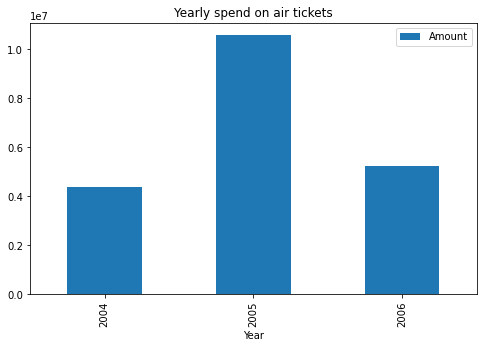

In [22]:
# 4b) Comparison of yearly spend on air tickets

air_tic_spend = Customer_Spend_Data[Customer_Spend_Data['Type'] == 'AIR TICKET']

air_tic_spend_yearly = air_tic_spend.groupby('Year').agg({'Amount' : sum})

air_tic_spend_yearly.plot(kind = 'bar', figsize = (8,5))
plt.title('Yearly spend on air tickets')
plt.show()


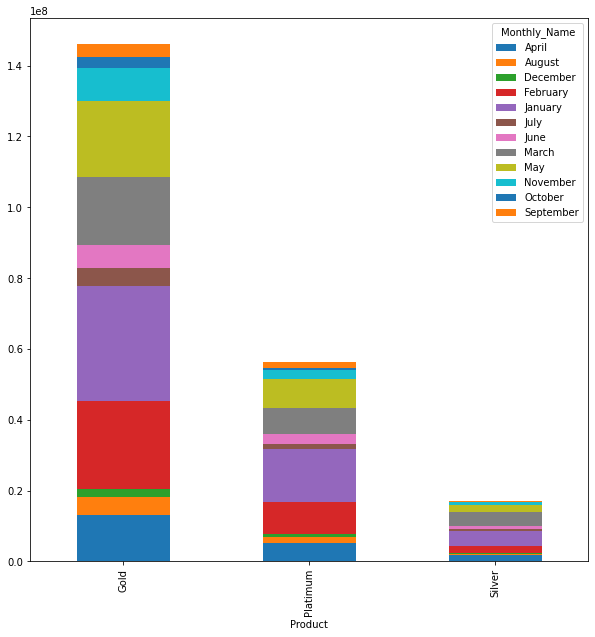

In [23]:
# 4c) Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

monthly_pdt_spend = pd.pivot_table(data = Customer_Spend_Data, index='Product', columns = 'Monthly_Name', values = 'Amount' ,
                                                     aggfunc= sum).plot(kind = 'bar', stacked = True, figsize = (10,10))

### 5. Write user defined PYTHON function to perform the following analysis:
### You need to find top 10 customers for each city in terms of their repayment amount by 
### different products and by different time periods i.e. year or month. The user should be able 
### to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
### function should automatically take these inputs while identifying the top 10 customers.

In [24]:
# Finding the month name and year from the date and naming accordingly for easier query 

Customer_Repayment_Data['Monthly'] = Customer_Repayment_Data['Month'].apply( lambda x : pd.Timestamp.strftime(x,format= '%B'))
Customer_Repayment_Data['Yearly'] = Customer_Repayment_Data['Month'].apply(lambda x : pd.Timestamp.strftime(x,format='%Y'))

def top_customers(User_Product, User_TimePeriod):
    city_month_pdt = Customer_Repayment_Data.loc[Customer_Repayment_Data.Product == User_Product].groupby(['Customer','City', 'Product',User_TimePeriod]).agg({'Amount' : sum })
    display(city_month_pdt.sort_values(['Amount'], ascending = False).head(10))

User_Product = str(input("Please Specify Product as 'Gold' , 'Silver' or 'Platinum': "))

User_TimePeriod = str(input("Please Specify Time Period as 'Yearly' or 'Monthly': "))

top_customers(User_Product, User_TimePeriod)


Please Specify Product as 'Gold' , 'Silver' or 'Platinum': Gold
Please Specify Time Period as 'Yearly' or 'Monthly': Yearly


,,,,Amount
Customer,City,Product,Yearly,
A61,COCHIN,Gold,2005,4276860.55
A44,DELHI,Gold,2005,4165317.77
A45,COCHIN,Gold,2005,4042447.57
A43,BANGALORE,Gold,2005,4006956.60
A13,BANGALORE,Gold,2005,3757673.00
A61,COCHIN,Gold,2006,3744127.41
A60,CALCUTTA,Gold,2005,3742856.10
A13,BANGALORE,Gold,2006,3477314.89
A29,CALCUTTA,Gold,2006,3434298.00
